# Agenda
* What are the draw backs of **train/test split** and how does **K-fold cross-validation** overcome this limitations.

* How can **cross-validation** be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**?

# Review of model evaluation procedures

**motivation**: Need a way to choose between machine learning models
* Goal is to estimate likely performance of a model on **out-of-sample data**

**Initial idea**: Train and test on the same data.
* But, maximizing **training accuracy** rewards overly complex models which **overfit** the training data

**Alternative idea**:Train/test split
* split the dataset into two pieces, so that the model can be trained and tested on **different data**
* **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance.
* But, It provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4) 
#changing the random state results in a different accuracy score. This is why testing accuracy is refferred to as having high variance.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9736842105263158


**Question**:What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

**Answer**:That's the essense of cross-validation!

# steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

Diagram of **5-fold Cross-Validation**:

![5-fold Cross-Validation](images/07_cross_validation_diagram.png)

In [6]:
 #simulate splitting of a dataset of 25 observations into 5 folds.
from sklearn.cross_validation import KFold
kfold = KFold(25, n_folds=5, shuffle=False)

#print the content of each training and testing sets.
print ('{}{:^65}{}'.format('Iteration','Training set observation','Testing set observation')) # '^' aligns center, '<' and '>' aligns left and right respectively.
for iteration, data in enumerate(kfold, start=1):
    print('{!s:^9} {} {!s:^25}'.format(iteration,data[0],data[1]))
    # Explicitly convert to a string object (as you did by decoding bytes to str) to get format spec support.
    #make the conversion explicit by using the !s string conversion

Iteration                    Training set observation                     Testing set observation
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


* Dataste contains **25 observations** (numbered 0 through 24)
* 5 fold cross-validation, thus it runs 5 iterations.
* For each iteration, every observation is either in the testing or training set **but not both**
* Every observation is in the testing set **exactly once**

## Comparing cross-validation to train/test split

 Advantages of **cross-validation**

* More accurate estimate on out-of-sample accuracy.
* More "efficient" use of data (every observation is used for training and testing)

Advantages of **train/test**

* Runs K times faster than K-Fold cross-validation.
* Simpler to examine the detailed results of the testing process.

## Cross-Validation Recommendation

1. K can be any number, but **K=10** is generally recommended.
2. For classification problems, **stratified sampling** is recommended for creating folds
    * Each response class should be represented with equal proportion in each of the K folds
    * scikit learn's cross_val_score does this by default.

## Cross-Validation example: parameter tuning

**Goal**: Select the best tuning parameters (aka "hyperparameters") on the iris dataset

In [7]:
from sklearn.cross_validation import cross_val_score

In [8]:
#10 fold cross-validation with k=5 for KNN
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [9]:
print(scores.mean())

0.9666666666666668


In [10]:
k_range = range(1,31) #numbers 1 through 30
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross-Validated Accuracy')

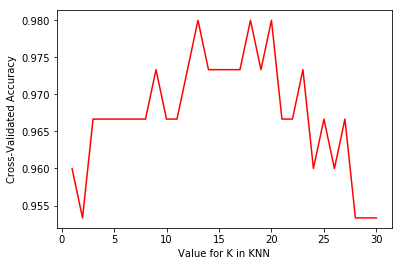

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(k_range,k_scores,'r-')
plt.xlabel('Value for K in KNN')
plt.ylabel('Cross-Validated Accuracy')

The maximum cross validated accuracy occurs at K=13 through K=20. The general shape of the curve is an upside 'U' which is common when examining the relationship between a model complexity and the model accuracy. This is an example of the Bias-Variance tradeoff in which lower values of K, produce a model with low bias and high variance while high values of K, produce a model with high bias and low variance. 
The best model is found at the middle because it balances bias and variance and thus is more likely to generalise the out-of-sample data. when choosing exactly which value of K to call the best, it is generally recommended to choose the value which produces the simplest model. In the case of KNN, higher values of k, produce lower complexity models and thus we choose K=20 as our single best KNN model.

  ## Cross-Validation example: model selection

In [12]:
#10 fold cross-validation with the best knn model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean())

0.9800000000000001


In [13]:
#10 fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean())

0.9533333333333334


Thus, we would conclude that KNN is likely a better choice than logistic regression for this particular problem.

## Cross-Validation example: feature selection

**Goal**: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset.

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [6]:
#pathlib converts filepath depanding on the environment.eg Windows, Mac, Linux
from pathlib import Path
file_path = Path('data/Advertising.csv')
# Read in the data
data = pd.read_csv(file_path, index_col=0)
print(data.head())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [23]:
#all three Features
feature_cols = ['TV','radio','newspaper']
X = data[feature_cols]
y = data.sales

In [26]:
#10 fold cross-validation with all three features
linreg = LinearRegression()
scores = cross_val_score(linreg,X,y,cv=10,scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


Mean squared results should be positive yet we got negative. This is because classification accuracy is a reward function meaning something you want to maximize. whereas mean squared error is a loss function meaning something you want to minimize. Finding the highest value of a reward function, makes sense for choosing the best model but finding the highest value of a loss function would select the worst model. since other functions rely on the results of cross_val_score, a design decision was made to negate the output for all loss functions so that when other scikit learn functions call cross_val_score, those functions can always assume that higher results indicate better models.

In [27]:
#to fix this issue
mse_scores = -scores
print(mse_scores)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]


In [33]:
#calculate mean RMSE for the 10 fold cross-validation
rmse = np.sqrt(mse_scores)
print(rmse.mean())

1.6913531708051797


In [35]:
#10 fold cross-validation with 2 features excluding newspaper
feature_cols = ['TV','radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(linreg,X,y,cv=10,scoring='neg_mean_squared_error')).mean())

1.6796748419090766


since this is a lower number, than the model that included newspaper, and root mean squared error is something we want to minimize we would conclude that the model excluding newspaper is a better model.